<font size="4">**8. Importing Libraries**</font>

In [2]:
import os
import rasterio
import numpy as np
from scipy.ndimage import gaussian_filter
import pandas as pd
from rasterstats import zonal_stats
import geopandas as gpd
import matplotlib.pyplot as plt

<font size="4">**9. Load Preprocessed Files**</font>

In [4]:
#path to the folder with preprocessed .tif files
preprocessed_folder = "./Downloads/reprojected"

#list all .tif files in the folder
tif_files = sorted([os.path.join(preprocessed_folder, f) for f in os.listdir(preprocessed_folder) if f.endswith(".tif")])

print(f"Loaded {len(tif_files)} preprocessed .tif files.")

Loaded 526 preprocessed .tif files.


<font size="4">**10. Extracting and Visualizing Rainfall Data**</font>

This section processes a set of preprocessed .tif files in the reprojected folder to extract raw rainfall data and visualize its distribution. The script first identifies all .tif files in the specified folder, sorts them, and iterates over each file. Using the rasterio library, the first band of each raster file, representing rainfall data, is read and flattened into a one-dimensional array. These arrays are collected into the raw_rainfall_values list, which is concatenated into a single NumPy array for analysis.

The concatenated rainfall data is visualized using a histogram, created with matplotlib. The histogram provides insights into the frequency distribution of rainfall values, showing the occurrence of different rainfall intensities (in millimeters) across the dataset. This visualization helps identify patterns, such as dominant rainfall ranges or anomalies, and supports further preprocessing or modeling efforts related to climate and environmental analysis.

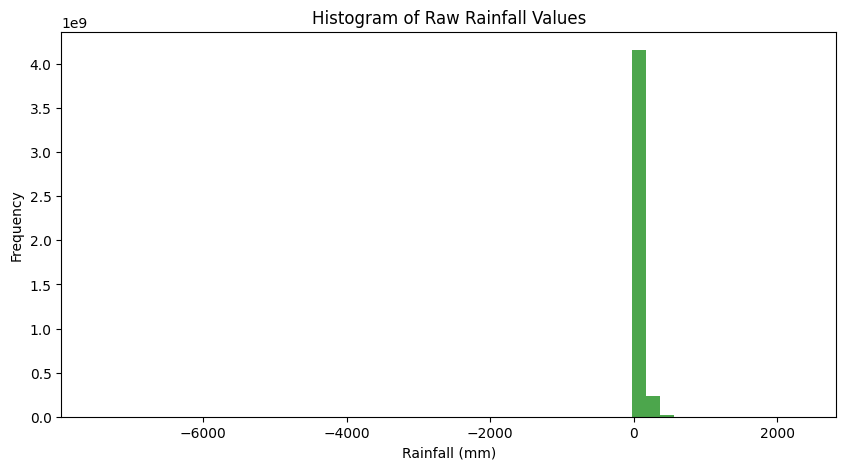

In [7]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

#path to the folder containing preprocessed .tif files
tif_folder = "./Downloads/reprojected/"

#list all .tif files
tif_files = sorted([os.path.join(tif_folder, f) for f in os.listdir(tif_folder) if f.endswith(".tif")])

#initialize a list to collect rainfall values
raw_rainfall_values = []

#iterate through each file and process
for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
        
        #collect raw rainfall values
        raw_rainfall_values.append(data.flatten())

#concatenate all raw rainfall values into one array
raw_rainfall_values = np.concatenate(raw_rainfall_values)

#plot histogram of raw rainfall values
plt.figure(figsize=(10, 5))
plt.hist(raw_rainfall_values, bins=50, color='green', alpha=0.7)
plt.title("Histogram of Raw Rainfall Values")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

<font size="4">**11. Statistical Inspection**</font>

This section computes summary statistics for the first band of each .tif file in the tif_files list. Using the rasterio library, the script reads the first band of each raster file, which contains numerical data representing rainfall or other environmental metrics. For each file, it calculates key statistical measures: the mean, standard deviation, minimum, and maximum values. These metrics provide a concise summary of the data's central tendency, variability, and range.

The calculated statistics are printed to the console, labeled with the corresponding file name for easy reference. This step is essential for understanding the dataset's characteristics, identifying anomalies, and verifying data consistency across files. Such statistical insights can guide further preprocessing, analysis, or modeling by highlighting patterns or irregularities in the raster data.

In [10]:
for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band of the raster file
        
        #calculate summary statistics
        mean = np.mean(data)
        std_dev = np.std(data)
        min_val = np.min(data)
        max_val = np.max(data)

        print(f"File: {tif_file}")
        print(f"Mean: {mean}, Std Dev: {std_dev}, Min: {min_val}, Max: {max_val}\n")

File: ./Downloads/reprojected/chirps-v2.0.1981.01.tif
Mean: 23.800575256347656, Std Dev: 58.859886169433594, Min: -7486.2421875, Max: 713.02490234375

File: ./Downloads/reprojected/chirps-v2.0.1981.02.tif
Mean: 26.23179054260254, Std Dev: 65.87398529052734, Min: -7486.2421875, Max: 927.334716796875

File: ./Downloads/reprojected/chirps-v2.0.1981.03.tif
Mean: 34.400386810302734, Std Dev: 72.91058349609375, Min: -7486.2421875, Max: 733.7992553710938

File: ./Downloads/reprojected/chirps-v2.0.1981.04.tif
Mean: 24.816251754760742, Std Dev: 55.8567008972168, Min: -7486.2421875, Max: 800.7584228515625

File: ./Downloads/reprojected/chirps-v2.0.1981.05.tif
Mean: 23.608795166015625, Std Dev: 56.64613342285156, Min: -7486.2421875, Max: 770.0862426757812

File: ./Downloads/reprojected/chirps-v2.0.1981.06.tif
Mean: 18.479822158813477, Std Dev: 50.371028900146484, Min: -7486.2421875, Max: 909.4464721679688

File: ./Downloads/reprojected/chirps-v2.0.1981.07.tif
Mean: 29.223398208618164, Std Dev: 75

<font size="4">**12. Identify and Remove Invalid Data**</font>

This code processes raster files to clean the data and compute summary statistics for the cleaned values. For each .tif file in the tif_files list, the first band of the raster is read using rasterio. Unrealistic values, such as negative rainfall measurements (less than 0), are replaced with NaN using NumPy’s where function. This step ensures that invalid data does not distort subsequent statistical calculations or analyses.

The cleaned data is then analyzed to compute summary statistics, including the mean, standard deviation, minimum, and maximum values, using NaN-aware functions (nanmean, nanstd, nanmin, nanmax) that ignore NaN values. These statistics are printed for each file, providing insights into the data distribution after cleaning. This process ensures the dataset is both valid and ready for further analysis, improving the reliability and accuracy of the derived insights.

In [13]:
#clean the data and calculate statistics
for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band of the raster file
        
        #replace unrealistic values (e.g., less than 0) with NaN
        data_cleaned = np.where(data < 0, np.nan, data)
        
        #calculate summary statistics for cleaned data
        mean_cleaned = np.nanmean(data_cleaned)  # Use nan-aware functions to ignore NaNs
        std_dev_cleaned = np.nanstd(data_cleaned)
        min_val_cleaned = np.nanmin(data_cleaned)
        max_val_cleaned = np.nanmax(data_cleaned)
        
        #print cleaned data statistics
        print(f"File: {tif_file}")
        print(f"Cleaned Data - Mean: {mean_cleaned}, Std Dev: {std_dev_cleaned}, Min: {min_val_cleaned}, Max: {max_val_cleaned}\n")

File: ./Downloads/reprojected/chirps-v2.0.1981.01.tif
Cleaned Data - Mean: 23.80539321899414, Std Dev: 58.68531036376953, Min: 0.0, Max: 713.02490234375

File: ./Downloads/reprojected/chirps-v2.0.1981.02.tif
Cleaned Data - Mean: 26.23661231994629, Std Dev: 65.7178726196289, Min: 0.0, Max: 927.334716796875

File: ./Downloads/reprojected/chirps-v2.0.1981.03.tif
Cleaned Data - Mean: 34.40522003173828, Std Dev: 72.7690658569336, Min: 0.0, Max: 733.7992553710938

File: ./Downloads/reprojected/chirps-v2.0.1981.04.tif
Cleaned Data - Mean: 24.82107162475586, Std Dev: 55.67258834838867, Min: 0.0, Max: 800.7584228515625

File: ./Downloads/reprojected/chirps-v2.0.1981.05.tif
Cleaned Data - Mean: 23.61361312866211, Std Dev: 56.464744567871094, Min: 0.0, Max: 770.0862426757812

File: ./Downloads/reprojected/chirps-v2.0.1981.06.tif
Cleaned Data - Mean: 18.484630584716797, Std Dev: 50.16741180419922, Min: 0.0, Max: 909.4464721679688

File: ./Downloads/reprojected/chirps-v2.0.1981.07.tif
Cleaned Data 

<font size="4">**13. Check Metadata**</font>

In [15]:
metadata = src.meta
print(metadata)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2901, 'height': 2887, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.05000000074505806, 0.0, -17.549999963492155,
       0.0, -0.05000000074505806, 37.34999996051192)}


The output from src.meta provides metadata about the raster file, summarizing its format, data type, dimensions, and georeferencing details. The 'driver': 'GTiff' indicates that the file is in GeoTIFF format, a widely used format for storing geospatial raster data. The 'dtype': 'float32' specifies that the pixel values are stored as 32-bit floating-point numbers, allowing for a broad range of precise values. 'nodata': None means no explicit no-data value is defined, suggesting that missing or invalid pixels are not marked in the file. The 'width': 2901 and 'height': 2887 describe the raster's dimensions in pixels, while 'count': 1 indicates it has a single data band.

The 'crs': CRS.from_epsg(4326' defines the coordinate reference system (CRS), using EPSG code 4326, which corresponds to the WGS84 geographic coordinate system commonly used in global datasets. The 'transform'` parameter specifies the geotransformation matrix, linking pixel coordinates to spatial coordinates. In this case, the raster has a pixel size of 0.05 degrees and covers an area defined by the matrix. This metadata is critical for spatial analysis, ensuring that the raster aligns correctly with other geospatial datasets.

<font size="4">**14. Cleaning and Clipping**</font>

This code processes raster files to clean and clip the data to a realistic range, storing the results for further use. For each .tif file in the tif_files list, the first band of the raster data is read using rasterio. If the raster file contains a designated no-data value (retrieved via src.nodatavals[0]), those pixels are replaced with NaN using NumPy's where function. If no no-data value is defined, the original data is retained without masking.

After handling no-data values, the data is clipped to a specified range of 0 to 1000 using NumPy's clip function, ensuring that all values fall within realistic limits for the dataset (e.g., rainfall in millimeters). The cleaned and clipped data for each file is appended to the clipped_files list. This process ensures that outliers and invalid values are handled, producing a standardized dataset suitable for analysis or modeling.

In [19]:
#list to store clipped data
clipped_files = []

for tif_file in tif_files:
    with rasterio.open(tif_file) as src:
        data = src.read(1)  # Read the first band
        no_data_value = src.nodatavals[0]
        
        #mask no-data values
        if no_data_value is not None:
            data_cleaned = np.where(data == no_data_value, np.nan, data)
        else:
            data_cleaned = data  # No masking needed
        
        #clip data to a realistic range
        data_clipped = np.clip(data_cleaned, 0, 1000)
        clipped_files.append(data_clipped)

<font size="4">**15. Histogram of Rainfall Values**</font>

This section generates a histogram to visualize the distribution of rainfall values in the clipped dataset. First, the histogram bins are defined using np.linspace to create 50 equally spaced intervals between 0 and 1000 mm, reflecting the range of clipped rainfall data. An array hist is initialized to store the cumulative frequency of rainfall values across all clipped datasets. For each clipped dataset in clipped_files, the np.histogram function calculates the frequency of non-NaN values within the defined bins, and the frequencies are summed into hist.

The resulting histogram is plotted using matplotlib. The x-axis represents rainfall values (in millimeters), divided into the defined bins, while the y-axis shows the frequency of rainfall values in each bin. This visualization helps identify patterns in the rainfall data, such as common rainfall ranges, outliers, or anomalies, providing valuable insights for further analysis.

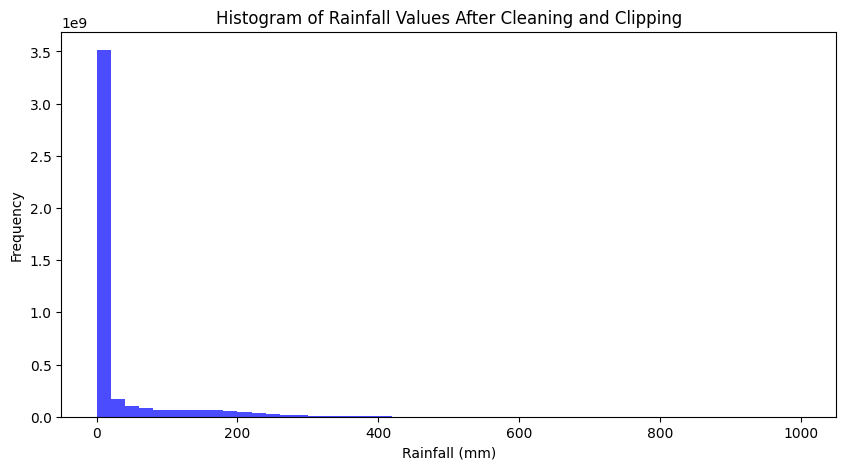

In [22]:
#prepare the histogram bins
bins = np.linspace(0, 1000, 51)  # 50 bins between 0 and 1000
hist = np.zeros(len(bins) - 1)

#calculate histogram
for data_clipped in clipped_files:
    hist += np.histogram(data_clipped[~np.isnan(data_clipped)], bins=bins)[0]

#plot histogram
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=np.diff(bins), align='edge', color='blue', alpha=0.7)
plt.title("Histogram of Rainfall Values After Cleaning and Clipping")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

<font size="4">**16. Global Min and Max Calculation**</font>

This code calculates the global minimum and maximum values from preprocessed (clipped) rainfall data stored in clipped_files. It initializes global_min to positive infinity and global_max to negative infinity to ensure that any valid values encountered will replace these initial values. The script iterates through each dataset in clipped_files, computing the local minimum and maximum values for the current dataset using np.nanmin and np.nanmax, which ignore NaN values. The global minimum and maximum are updated by comparing the current global values with the local values from each dataset.

At the end of the iteration, the computed global_min and global_max represent the smallest and largest rainfall values across all datasets, respectively. This process efficiently handles large datasets by processing the values in chunks, avoiding memory overload. These global statistics are crucial for understanding the overall range of the dataset and can guide further analysis or normalization.

In [25]:
#initialize global min and max
global_min = float('inf')
global_max = float('-inf')

#compute global min and max in chunks
for data_clipped in clipped_files:  # Use pre-clipped data
    local_min = np.nanmin(data_clipped)  # Ignore NaN values
    local_max = np.nanmax(data_clipped)  # Ignore NaN values
    global_min = min(global_min, local_min)
    global_max = max(global_max, local_max)

print(f"Global Min: {global_min}, Global Max: {global_max}")

Global Min: 0.0, Global Max: 1000.0


<font size="4">**17. Normalization**</font>

This section normalizes rainfall data from the clipped_files list and saves the normalized datasets to a new folder called normalized. For each dataset, normalization is performed, which scales all values to a range between 0 and 1. This normalization ensures consistency in the data and facilitates compatibility with machine learning models or statistical analyses.

The normalized data is saved as GeoTIFF files in the normalized folder. The script retrieves the original file's metadata (e.g., spatial reference and dimensions) using rasterio, updates the data type to float32, and sets nodata values to NaN. The normalized data is then written to the output folder, maintaining the original filenames for easy traceability. This process ensures the normalized datasets retain their geospatial integrity while being standardized for downstream analysis.

In [28]:
#save normalized data to files for reuse
normalized_folder = "./Downloads/normalized/"
os.makedirs(normalized_folder, exist_ok=True)

for i, data_clipped in enumerate(clipped_files):
    data_normalized = (data_clipped - global_min) / (global_max - global_min)
    
    #save the normalized file
    tif_file = tif_files[i]
    with rasterio.open(tif_file) as src:
        profile = src.profile
        profile.update(dtype=rasterio.float32, nodata=np.nan)
        normalized_path = os.path.join(normalized_folder, os.path.basename(tif_file))
        
        with rasterio.open(normalized_path, 'w', **profile) as dst:
            dst.write(data_normalized.astype(rasterio.float32), 1)